In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h',
                                                                   'price_change_percentage_7d',
                                                                   'price_change_percentage_14d',
                                                                   'price_change_percentage_30d',
                                                                   'price_change_percentage_60d',
                                                                   'price_change_percentage_200d',
                                                                   'price_change_percentage_1y']])
market_data_scaled[:5]                                                    

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [5]:
# Create a DataFrame with the scaled data
market_data_transformed_df = pd.DataFrame(market_data_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                                                   'price_change_percentage_14d',
                                                                   'price_change_percentage_30d',
                                                                   'price_change_percentage_60d',
                                                                   'price_change_percentage_200d',
                                                                   'price_change_percentage_1y'])

# Copy the crypto names from the original data
# Set the coinid column as index
market_data_transformed_df.index = market_data_df.index
# ---- why not explicitly specify column? (A: Index is taken from MD_DF and assigned to MDT_df)


# Display sample data
market_data_transformed_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(market_data_transformed_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


<Axes: title={'center': "Elbow Curve of 'market_data_transformed_df'"}, xlabel='k'>

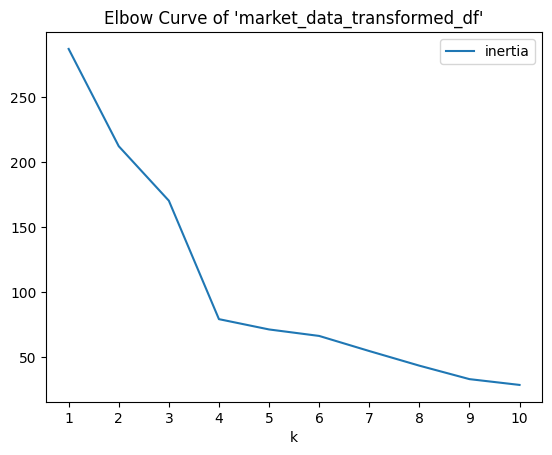

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x='k',
                   y='inertia',
                   title="Elbow Curve of 'market_data_transformed_df'",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Best value for 'k' based on this plot is Four (4) as there is a distinct elbow at this point.  

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [9]:
# Fit the K-Means model using the scaled data
model.fit(market_data_transformed_df)


KMeans(n_clusters=4, random_state=1)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4_market_data = model.predict(market_data_transformed_df)

# View the resulting array of cluster values.
k_4_market_data

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [11]:
# Create a copy of the DataFrame
k4_market_predictions = market_data_transformed_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
k4_market_predictions["Predicted Crypto Clusters"] = k_4_market_data


# Display sample data
k4_market_predictions.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted Crypto Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


Text(0.5, 1.0, 'Quick View: "% Change:  24 hours / 7 days"')

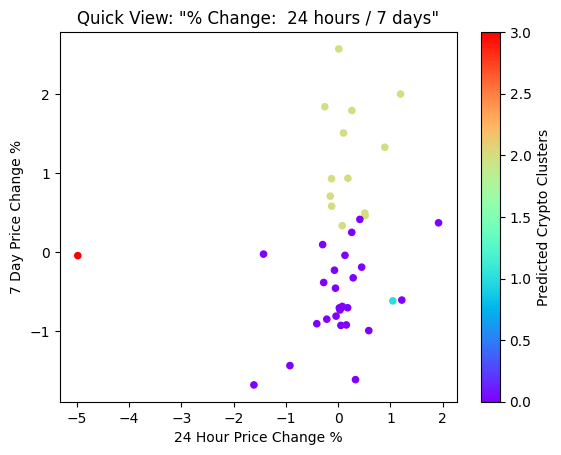

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
k4_market_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Predicted Crypto Clusters",
    colormap="rainbow"
)
plt.xlabel("24 Hour Price Change %")
plt.ylabel("7 Day Price Change %")
plt.title('Quick View: "% Change:  24 hours / 7 days"')

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_mrkt_pca = pca.fit_transform(k4_market_predictions)

# View the first five rows of the DataFrame. 
crypto_mrkt_pca[:5]

array([[ 0.44890795,  1.24537573,  0.8506404 ],
       [ 0.49536709,  0.899823  ,  1.31755943],
       [-0.81884571, -0.07189909, -0.69501507],
       [-0.84035711, -0.08005407, -0.54435952],
       [ 0.81324004,  2.66952035,  1.64332113]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_

array([2.85118482, 2.56433972, 1.85004281])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  

In [17]:
# Create a new DataFrame with the PCA data.
# crypto_pca_df = crypto_mrkt_pca.copy()

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(
    crypto_mrkt_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)


# Copy the crypto names from the original data
# Set the coinid column as index
crypto_pca_df.index = market_data_df.index



# Display sample data
crypto_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,0.448908,1.245376,0.850640
ethereum,0.495367,0.899823,1.317559
tether,-0.818846,-0.071899,-0.695015
ripple,-0.840357,-0.080054,-0.544360
bitcoin-cash,0.813240,2.669520,1.643321


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(crypto_pca_df)
    inertia.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_curve = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve)

# Display the DataFrame
elbow_curve_df.head()

,k,inertia
0,1,290.622694
1,2,207.307439
2,3,123.126951
3,4,44.130602
4,5,33.217427


Text(0, 0.5, 'Inertia')

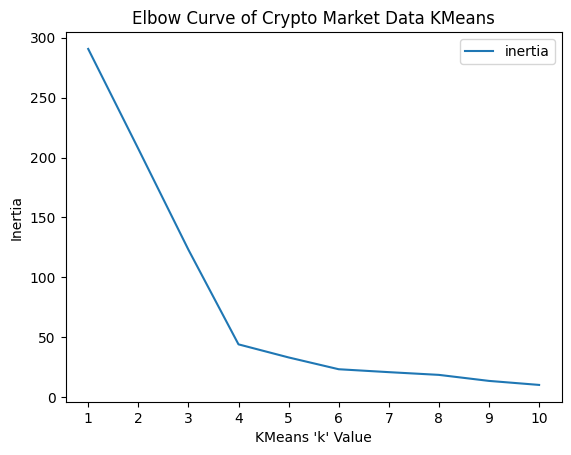

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_df.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve of Crypto Market Data KMeans",
    xticks=k
)
plt.xlabel("KMeans 'k' Value")
plt.ylabel("Inertia")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  Based on this line plot, there is a clear kink at 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no, this KMeans supports the earlier model of four clusters

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [21]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)
# crypto_pca_df


KMeans(n_clusters=4, random_state=1)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
k_4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [23]:
# Create a copy of the DataFrame with the PCA data
k_4_predict_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
k_4_predict_df["Predicted Crypto Clusters"] = k_4

# Display sample data
k_4_predict_df.head(5)


,PCA1,PCA2,PCA3,Predicted Crypto Clusters
coin_id,,,,
bitcoin,0.448908,1.245376,0.850640,1
ethereum,0.495367,0.899823,1.317559,1
tether,-0.818846,-0.071899,-0.695015,0
ripple,-0.840357,-0.080054,-0.544360,0
bitcoin-cash,0.813240,2.669520,1.643321,1


Text(0.5, 1.0, 'Four Cluster PCA Scatter Plot of Crypto Market Data')

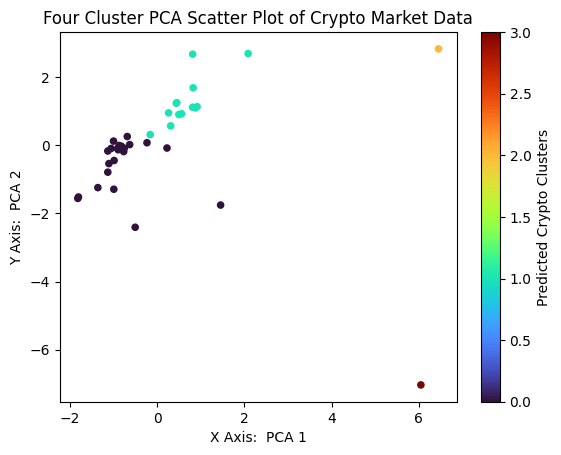

In [24]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
k_4_predict_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="Predicted Crypto Clusters",
    colormap="turbo"
)
plt.xlabel("X Axis:  PCA 1")
plt.ylabel("Y Axis:  PCA 2")
plt.title('Four Cluster PCA Scatter Plot of Crypto Market Data')

### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.
crypto_pca_component_weights = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2", "PCA3"], index=k4_market_predictions.columns)
crypto_pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.219011,0.499630,-0.181473
price_change_percentage_7d,0.178767,0.319433,0.546037
price_change_percentage_14d,0.297589,0.483024,0.081269
price_change_percentage_30d,0.361440,0.342065,-0.370361
price_change_percentage_60d,0.368955,0.148288,-0.500222
price_change_percentage_200d,0.493587,-0.294811,-0.123208
price_change_percentage_1y,0.431207,-0.410509,0.075030
Predicted Crypto Clusters,0.367672,0.143495,0.504090


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PCA1 shows it is most strongly influenced over longer time periods (price_change_percentage_200d = 49.36%, and price_change_percentage_1y = 43.12%).
PCA2  Shows the strongest influences in the short term with a 24 hour price change percent of 50% and 14 day chnge percent of 48.30% with a dramatic negative weight at the 1-year mark (-41.05%).
PCA3 shows more medium timeframe influence weights and may represent mediuim values that I am guessing are market corrections. 
Given this informatin and the volititty of this market, I would encourage diversification and careful monitoring for both safety in diversification and protection from investing excesively in just one or two crypto currancies.
    

C:\Users\resto\AppData\Local\Temp\ipykernel_24288\888332757.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c=colors[int(clusters[i])],


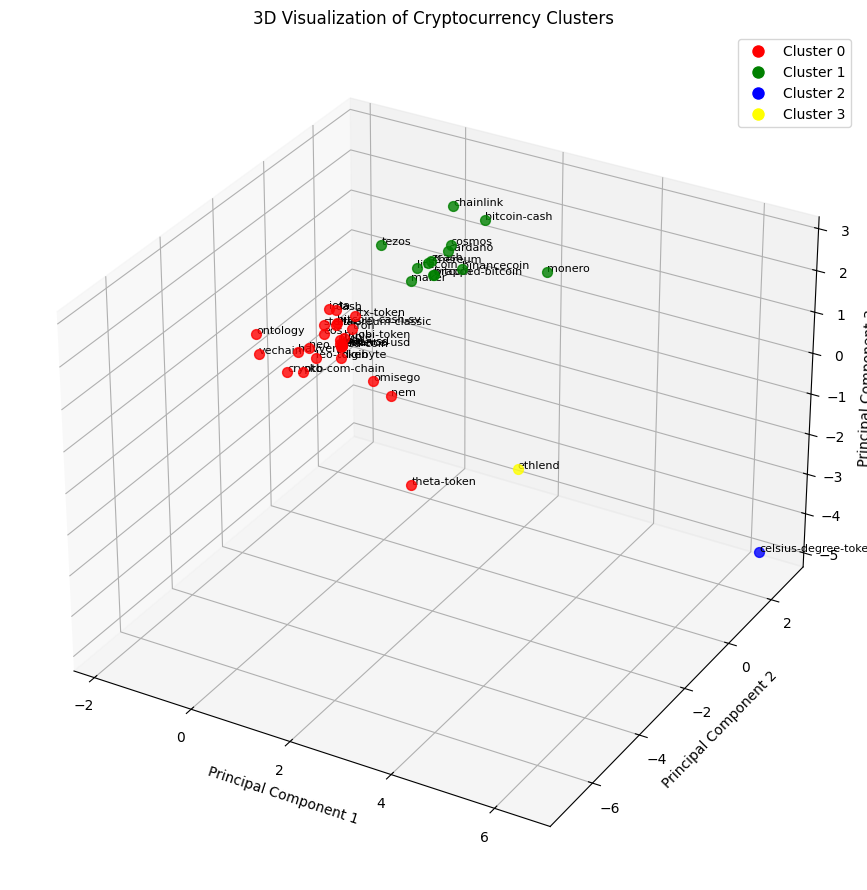

In [26]:
#  Self Driven Test with 3-D plotting of the PCA Data
# Import required 3D plotting tools 1st:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# Plot with 3D projection
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# ID the cluster labels and colors
clusters = k_4_predict_df["Predicted Crypto Clusters"]
colors = ['red', 'green', 'blue', 'yellow']

# For Loop to Plot each point with its cluster color
for i in range(len(k_4_predict_df)):
    ax.scatter(
        k_4_predict_df.iloc[i]["PCA1"],
        k_4_predict_df.iloc[i]["PCA2"],
        k_4_predict_df.iloc[i]["PCA3"],
        c=colors[int(clusters[i])],
        s=50,  
        alpha=0.8 
    )

# Labeling the points
for i, coin in enumerate(k_4_predict_df.index):
    ax.text(
        k_4_predict_df.iloc[i]["PCA1"],
        k_4_predict_df.iloc[i]["PCA2"],
        k_4_predict_df.iloc[i]["PCA3"],
        coin,
        size=8
    )

# Labels and title for plot
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Cryptocurrency Clusters')

# Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=colors[i], markersize=10,
                          label=f'Cluster {i}') for i in range(len(set(clusters)))]
ax.legend(handles=legend_elements, loc='upper right')

# Testing with Grid lines 
ax.grid(True)

plt.tight_layout()
plt.show()